# This is a test of clustering players

In [42]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [20, 20]
pd.set_option("precision", 5)

# We load the dataset

In [43]:
players = pd.read_csv('data/timetomodel.csv')
players.head()

,Player,Pos,Age,Team,G,MP,PER,OWS,DWS,WS,...,ORB,DRB,TRB,AST,STL,BLK,Year,Allstar,Years_In_NBA,PR
0,Andre Moore,PF-SF,23,TOT,10,50,12.1,-0.1,0.1,0.0,...,0.6,0.8,1.4,0.6,0.2,0.1,1988,0,1,-18.54431
1,Armen Gilliam,PF,23,PHO,55,1807,12.9,-0.1,1.4,1.3,...,2.4,5.5,7.9,1.3,1.1,0.5,1988,0,1,7.54553
2,Bart Kofoed,SG,23,UTA,36,225,1.9,-0.4,0.2,-0.1,...,0.1,0.3,0.4,0.6,0.2,0.0,1988,0,1,-22.17359
3,Billy Donovan,PG,22,NYK,44,364,8.7,-0.4,0.3,-0.1,...,0.1,0.5,0.6,2.0,0.4,0.0,1988,0,1,-18.81340
4,Brad Lohaus,PF,23,BOS,70,718,12.2,0.2,0.8,0.9,...,0.7,1.3,2.0,0.7,0.3,0.6,1988,0,1,-10.92601


We'll drop the seasons of players where it was not yet their 3rd season so those who weren't in the league for long skew the data

In [3]:
players_atleast_3 = players[players.Years_In_NBA >= 3]
players_atleast_3.head()

,Player,Pos,Age,Team,G,MP,PER,OWS,DWS,WS,...,ORB,DRB,TRB,AST,STL,BLK,Year,Allstar,Years_In_NBA,PR
199,Armen Gilliam,PF,25,TOT,76,2426,16.6,2.3,2.3,4.5,...,2.8,5.1,7.9,1.3,0.9,0.7,1990,0,3,16.11847
204,Brad Lohaus,PF,25,TOT,80,1943,13.6,0.9,2.4,3.3,...,1.2,3.8,5.0,2.1,0.7,1.1,1990,0,3,6.76391
206,Brian Rowsom,PF,24,CHH,44,559,13.6,0.5,0.5,1.0,...,1.0,2.0,3.0,0.5,0.4,0.3,1990,0,3,-10.00229
210,Charles Davis,SF,31,CHI,53,429,6.7,-0.5,0.3,-0.2,...,0.5,1.1,1.5,0.3,0.2,0.2,1990,0,3,-17.68428
213,Chris Dudley,PF,24,TOT,64,1356,9.5,-1.8,1.9,0.2,...,2.7,3.9,6.6,0.6,0.6,1.1,1990,0,3,-2.73029


In [4]:
players.columns

Index(['Player', 'Pos', 'Age', 'Team', 'G', 'MP', 'PER', 'OWS', 'DWS', 'WS',
       'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'Year', 'Allstar',
       'Years_In_NBA', 'PR'],
      dtype='object')

We store the numerical columns that we'll use in the model

In [12]:
value_cols = ['MP', 'PER', 'OWS', 'DWS', 'WS',
       'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK','PR']

In [6]:
players_pivoted = players_atleast_3.pivot_table(index="Player", values=value_cols, columns="Year")

In [7]:
players_pivoted.reset_index().head()

Player   2P                                          ...   \
Year               1990 1991 1992 1993 1994 1995 1996 1997 1998  ...    
0      A.J. Guyton  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    
1       A.J. Price  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    
2     Aaron Brooks  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    
3     Aaron Gordon  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    
4       Aaron Gray  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    

     Years_In_NBA                                                
Year         2009 2010 2011 2012 2013 2014 2015 2016 2017  2018  
0             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1             NaN  NaN  NaN  3.0  4.0  5.0  6.0  NaN  NaN   NaN  
2             NaN  3.0  4.0  NaN  5.0  6.0  7.0  8.0  9.0  10.0  
3             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0   4.0  
4             NaN  3.0  4.0  5.0  6.0  7.0  NaN  NaN  NaN   NaN  

[5 rows x 668 columns]

In [8]:
players_pivoted.shape

(1360, 667)

In [9]:
player_names = players_pivoted.index
player_names

Index(['A.J. Guyton', 'A.J. Price', 'Aaron Brooks', 'Aaron Gordon',
       'Aaron Gray', 'Aaron Harrison', 'Aaron McKie', 'Aaron Williams',
       'Acie Earl', 'Acie Law',
       ...
       'Yinka Dare', 'Zach LaVine', 'Zach Randolph', 'Zan Tabak',
       'Zarko Cabarkapa', 'Zaza Pachulia', 'Zeljko Rebraca', 'Zendon Hamilton',
       'Zoran Planinic', 'Zydrunas Ilgauskas'],
      dtype='object', name='Player', length=1360)

In [10]:
len(player_names)

1360

In [4]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

In [5]:
imputer = preprocessing.Imputer(strategy="mean")
scaler = preprocessing.StandardScaler()

In [6]:
processing_pipeline = make_pipeline(
    imputer,
    scaler
)

In [7]:
players_processed = processing_pipeline.fit_transform(players_pivoted)

NameError: name 'players_pivoted' is not defined

In [15]:
players_processed

array([[ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         0.00000000e+00,  4.58045066e-16,  4.45332287e-16],
       [ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         0.00000000e+00,  4.58045066e-16,  4.45332287e-16],
       [ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         1.71114278e-01,  7.00879843e-01,  1.29015097e+00],
       ...,
       [ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         0.00000000e+00,  4.58045066e-16,  4.45332287e-16],
       [ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         0.00000000e+00,  4.58045066e-16,  4.45332287e-16],
       [ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         0.00000000e+00,  4.58045066e-16,  4.45332287e-16]])

In [16]:
from scipy.sparse import coo_matrix
players_sparse = coo_matrix(players_processed)

In [17]:
players_sparse

<1360x667 sparse matrix of type '<class 'numpy.float64'>'
	with 618267 stored elements in COOrdinate format>

SVD manually done; dimensionality not decreased

In [18]:
from scipy.sparse.linalg import svds

In [19]:
U,s, V = svds(players_sparse,  k=10)
players_diag_matrix = np.zeros((s.shape[0], s.shape[0]))

for i in range(s.shape[0]):
    players_diag_matrix[i,i] = s[i]

players_full_svd = U @ players_diag_matrix @ V

In [20]:
players_full_svd.shape

(1360, 667)

TruncatedSVD used so we can reduce the dimensionality of the data

In [21]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)

In [22]:
players_svd = svd.fit_transform(players_sparse)

DBSCAN used here

In [23]:
estimator_dbscan = DBSCAN(eps=1, min_samples=150)
dbscan_labels = estimator_dbscan.fit(X=players_svd).labels_

In [24]:
dbscan_labels

array([-1, -1, -1, ..., -1, -1, -1])

In [25]:
DBSCAN?

In [26]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [27]:
GridSearchCV?

In [28]:
param_space = {
    'eps': np.linspace(0.3, 3, 20),
    'min_samples': range(3, 100)
}

In [29]:
from sklearn.metrics import silhouette_score

We had to create our own silhouette scoring function because RandomizedSearchCV assumes true classes are provided, but as DBSCAN/KMeans is unsupervised learning, we provide the labels of the fit as the "true class"

In [30]:
def silhouette_cv(estimator, X, y=None):
    y_pred = estimator.fit(X).labels_
    print(pd.Series(y_pred).unique())
    print(estimator.get_params())
    return silhouette_score(X, y_pred)

In [31]:
random = RandomizedSearchCV(estimator=estimator_dbscan,
                           param_distributions=param_space,
                           scoring=silhouette_cv,
)

In [32]:
clusterer = DBSCAN(algorithm='auto', eps=2.7222222222222223, leaf_size=30,
    metric='euclidean', metric_params=None, min_samples=28, n_jobs=1,
    p=None)

In [33]:
clusterer.fit(players_svd).labels_

array([ 0,  0,  0, ...,  0,  0, -1])

In [34]:
silhouette_score(players_svd, clusterer.labels_)

0.3763099242426066

In [35]:
print(random.best_estimator_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [36]:
clusters_dbscan = clusterer.labels_

In [37]:
pd.DataFrame?

In [38]:
player_clusters = pd.DataFrame(data=clusters, index=player_names, columns=['cluster'])
player_clusters.cluster.value_counts()

NameError: name 'clusters' is not defined

Trying KMeans now

In [39]:
estimator_kmeans = KMeans(random_state=42, n_clusters=5)

estimator_kmeans.fit(players_processed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [40]:
clusters_kmeans = estimator_kmeans.labels_
clusters

NameError: name 'clusters' is not defined

In [41]:
centroids = estimator_kmeans.cluster_centers_
centroids

array([[-7.70371978e-33, -1.78775571e-15,  1.41233373e-15, ...,
         1.55099737e+00,  9.48024154e-01,  8.15591941e-01],
       [-5.72877667e-02, -6.46383447e-02, -7.84012105e-02, ...,
        -9.92233477e-02, -1.03746820e-01, -1.27386678e-01],
       [ 2.90174992e+00,  3.18977560e+00,  3.81335113e+00, ...,
         1.84949605e-01,  2.09851436e-01,  2.30493375e-01],
       [-7.70371978e-33,  3.72852450e-02,  6.98141207e-02, ...,
         5.23618929e-02,  1.65802697e-01,  1.84613386e-01],
       [-3.08148791e-33, -1.78775571e-15,  1.41233373e-15, ...,
         4.11274669e-01,  8.54698033e-01,  1.33960963e+00]])

In [42]:
from sklearn.metrics import euclidean_distances

In [43]:
centroid_distances = euclidean_distances(centroids)
centroid_distances

array([[ 0.        , 33.57170112, 52.46008227, 34.8500102 , 36.50662115],
       [33.57170112,  0.        , 43.01001779, 26.62365632, 28.4540959 ],
       [52.46008227, 43.01001779,  0.        , 38.13946217, 49.63118966],
       [34.8500102 , 26.62365632, 38.13946217,  0.        , 37.17040299],
       [36.50662115, 28.4540959 , 49.63118966, 37.17040299,  0.        ]])

In [44]:
players_pivoted['clusters'] = clusters_kmeans
players_pivoted.head()

2P                                                ...     \
Year         1990 1991 1992 1993 1994 1995 1996 1997 1998 1999   ...      
Player                                                           ...      
A.J. Guyton   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...      
A.J. Price    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...      
Aaron Brooks  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...      
Aaron Gordon  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...      
Aaron Gray    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...      

             Years_In_NBA                                          clusters  
Year                 2010 2011 2012 2013 2014 2015 2016 2017  2018           
Player                                                                       
A.J. Guyton           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        1  
A.J. Price            NaN  NaN  3.0  4.0  5.0  6.0  NaN  NaN   NaN        1  
Aaron Brooks          3.0  4.0  NaN  5.0  6.0  7.0  8.0  9.0  10.0        1  
Aaron Gordon          NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0   4.0        1  
Aaron Gray            3.0  4.0  5.0  6.0  7.0  NaN  NaN  NaN   NaN        1  

[5 rows x 668 columns]

An important aspect when using K-means is that the distances are related to the variable scales. So we have to normalize the data before using this algorithm for clustering.

In [8]:
players_atleast_3.drop(columns=['Allstar'], axis=1, inplace=True)
players_atleast_3.head()

,Player,Pos,Age,Team,G,MP,PER,OWS,DWS,WS,...,FTA,ORB,DRB,TRB,AST,STL,BLK,Year,Years_In_NBA,PR
199,Armen Gilliam,PF,25,TOT,76,2426,16.6,2.3,2.3,4.5,...,5.5,2.8,5.1,7.9,1.3,0.9,0.7,1990,3,16.11847
204,Brad Lohaus,PF,25,TOT,80,1943,13.6,0.9,2.4,3.3,...,1.3,1.2,3.8,5.0,2.1,0.7,1.1,1990,3,6.76391
206,Brian Rowsom,PF,24,CHH,44,559,13.6,0.5,0.5,1.0,...,1.9,1.0,2.0,3.0,0.5,0.4,0.3,1990,3,-10.00229
210,Charles Davis,SF,31,CHI,53,429,6.7,-0.5,0.3,-0.2,...,0.2,0.5,1.1,1.5,0.3,0.2,0.2,1990,3,-17.68428
213,Chris Dudley,PF,24,TOT,64,1356,9.5,-1.8,1.9,0.2,...,2.8,2.7,3.9,6.6,0.6,0.6,1.1,1990,3,-2.73029


In [13]:
numerical_data = players_atleast_3[value_cols]
#categorical_data = players_atleast_3[['Allstar']]
numerical_data.shape

(7944, 22)

In [14]:
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data)
numerical_data_normalized = pd.DataFrame(
                    numerical_data_normalized,
                    columns=numerical_data.columns) 
numerical_data_normalized.head()

,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,3P,...,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,PR
0,0.69613,0.48794,0.28977,0.32673,0.27854,0.77489,0.22069,0.52459,0.44604,0.00000,...,0.52564,0.42553,0.41985,0.41176,0.44348,0.48466,0.11111,0.31034,0.15556,0.52099
1,0.55753,0.47428,0.21023,0.33663,0.22374,0.77848,0.21379,0.31148,0.29856,0.11765,...,0.28205,0.09574,0.09924,0.17647,0.33043,0.30675,0.17949,0.24138,0.24444,0.44035
2,0.16040,0.47428,0.18750,0.14851,0.11872,0.74978,0.13793,0.14754,0.14748,0.00000,...,0.17094,0.15957,0.14504,0.14706,0.17391,0.18405,0.04274,0.13793,0.06667,0.29581
3,0.12310,0.44288,0.13068,0.12871,0.06393,0.70493,0.09655,0.09016,0.10791,0.01961,...,0.10684,0.01064,0.01527,0.07353,0.09565,0.09202,0.02564,0.06897,0.04444,0.22959
4,0.38910,0.45562,0.05682,0.28713,0.08219,0.74170,0.09655,0.18852,0.19784,0.00000,...,0.23504,0.09574,0.21374,0.39706,0.33913,0.40491,0.05128,0.20690,0.24444,0.35850


In [15]:
players_kmeans_processed_no_allstar = numerical_data_normalized

In [17]:
players_kmeans_processed = pd.concat([
                            numerical_data_normalized
                        ], axis=1
)

In [18]:
players_kmeans_processed.head()

,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,3P,...,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,PR
0,0.69613,0.48794,0.28977,0.32673,0.27854,0.77489,0.22069,0.52459,0.44604,0.00000,...,0.52564,0.42553,0.41985,0.41176,0.44348,0.48466,0.11111,0.31034,0.15556,0.52099
1,0.55753,0.47428,0.21023,0.33663,0.22374,0.77848,0.21379,0.31148,0.29856,0.11765,...,0.28205,0.09574,0.09924,0.17647,0.33043,0.30675,0.17949,0.24138,0.24444,0.44035
2,0.16040,0.47428,0.18750,0.14851,0.11872,0.74978,0.13793,0.14754,0.14748,0.00000,...,0.17094,0.15957,0.14504,0.14706,0.17391,0.18405,0.04274,0.13793,0.06667,0.29581
3,0.12310,0.44288,0.13068,0.12871,0.06393,0.70493,0.09655,0.09016,0.10791,0.01961,...,0.10684,0.01064,0.01527,0.07353,0.09565,0.09202,0.02564,0.06897,0.04444,0.22959
4,0.38910,0.45562,0.05682,0.28713,0.08219,0.74170,0.09655,0.18852,0.19784,0.00000,...,0.23504,0.09574,0.21374,0.39706,0.33913,0.40491,0.05128,0.20690,0.24444,0.35850


We'll change the dtypes to float32 as float64 is too big for some functions

In [19]:
players_kmeans_processed32 = players_kmeans_processed_no_allstar.astype('float32')
players_kmeans_processed32.dtypes

MP      float32
PER     float32
OWS     float32
DWS     float32
WS      float32
BPM     float32
VORP    float32
FG      float32
FGA     float32
3P      float32
3PA     float32
2P      float32
2PA     float32
FT      float32
FTA     float32
ORB     float32
DRB     float32
TRB     float32
AST     float32
STL     float32
BLK     float32
PR      float32
dtype: object

In [20]:
players_kmeans_processed32.isnull().values.any()

False

In [21]:
def cluster_summary(cluster_id):
    cluster = players_pivoted[clusters==cluster_id]
    cluster_summary = cluster.mean().to_dict()
    #cluster[categorical_data.columns].mode().to_dict(orient="records")[0]
    #cluster_summary.update(cluster.mean().to_dict())
    cluster_summary["cluster_id"] = cluster_id
    return cluster_summary

In [54]:
cluster_summary(1)

NameError: name 'clusters' is not defined

Plotting the DBSCAN clusters; as you can see, we have too many outliers

In [22]:
import matplotlib.pyplot as plt

In [56]:
core_samples_mask = np.zeros_like(clusterer.labels_, dtype=bool)
core_samples_mask[clusterer.core_sample_indices_] = True

In [57]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

NameError: name 'labels' is not defined

In [58]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = players_svd[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = players_svd[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

NameError: name 'labels' is not defined

Using KMeans and plotting the heatmap to see characteristics of clusters

In [23]:
def kmeans_cluster(df, n_clusters=2, test=None):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    if test is not None:
        test_clusters = model.fit_predict(test)
        print(test_clusters)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def graph_summary_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [24]:
cluster_results = kmeans_cluster(players_kmeans_processed32, 6)
cluster_summary = graph_summary_clustering(cluster_results);

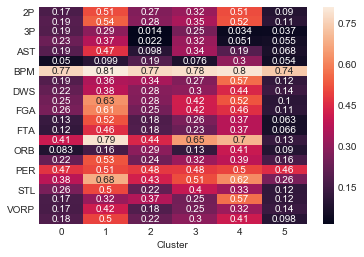

In [25]:
import seaborn as sns
sns.set_style('dark')
sns.heatmap(cluster_summary.transpose(), annot=True);

In [26]:
cluster_results['Cluster Name'] = ''
cluster_results['Cluster Name'][cluster_results['Cluster']==0] = 'Bench'
cluster_results['Cluster Name'][cluster_results['Cluster']==1] = 'Nonbig Allstar'
cluster_results['Cluster Name'][cluster_results['Cluster']==2] = 'Big Starter/Fringe Starter'
cluster_results['Cluster Name'][cluster_results['Cluster']==3] = 'Nonbig Starter/Fringe Starter'
cluster_results['Cluster Name'][cluster_results['Cluster']==4] = 'Big Allstar'
cluster_results['Cluster Name'][cluster_results['Cluster']==5] = 'scrub'

players_atleast_3 = players_atleast_3.reset_index().drop('index', axis=1)
players_atleast_3['Cluster Name'] = cluster_results['Cluster Name']


In [138]:
cluster_results.Cluster

0       4
1       2
2       5
3       5
4       2
5       5
6       5
7       3
8       4
9       5
10      2
11      4
12      5
13      5
14      4
15      3
16      5
17      1
18      3
19      2
20      3
21      5
22      3
23      5
24      5
25      4
26      1
27      5
28      0
29      4
       ..
7914    3
7915    5
7916    0
7917    0
7918    3
7919    2
7920    0
7921    0
7922    2
7923    0
7924    5
7925    3
7926    2
7927    3
7928    2
7929    0
7930    5
7931    5
7932    1
7933    0
7934    0
7935    0
7936    3
7937    3
7938    2
7939    5
7940    0
7941    3
7942    2
7943    2
Name: Cluster, Length: 7944, dtype: int32

In [139]:
players_atleast_3.head(20)

,Player,Pos,Age,Team,G,MP,PER,OWS,DWS,WS,...,ORB,DRB,TRB,AST,STL,BLK,Year,Years_In_NBA,PR,Cluster Name
0,Armen Gilliam,PF,25,TOT,76,2426,16.6,2.3,2.3,4.5,...,2.8,5.1,7.9,1.3,0.9,0.7,1990,3,16.11847,Big Allstar/good starter
1,Brad Lohaus,PF,25,TOT,80,1943,13.6,0.9,2.4,3.3,...,1.2,3.8,5.0,2.1,0.7,1.1,1990,3,6.76391,Big Fringe Starter
2,Brian Rowsom,PF,24,CHH,44,559,13.6,0.5,0.5,1.0,...,1.0,2.0,3.0,0.5,0.4,0.3,1990,3,-10.00229,scrub
3,Charles Davis,SF,31,CHI,53,429,6.7,-0.5,0.3,-0.2,...,0.5,1.1,1.5,0.3,0.2,0.2,1990,3,-17.68428,scrub
4,Chris Dudley,PF,24,TOT,64,1356,9.5,-1.8,1.9,0.2,...,2.7,3.9,6.6,0.6,0.6,1.1,1990,3,-2.73029,Big Fringe Starter
5,Chris Welp,C,26,TOT,27,198,6.3,-0.2,0.2,0.0,...,0.7,1.1,1.8,0.3,0.2,0.3,1990,3,-18.02960,scrub
6,Dave Hoppen,C,25,CHH,10,135,7.7,-0.1,0.1,0.0,...,1.9,1.7,3.6,0.6,0.2,0.1,1990,3,-14.76186,scrub
7,Dennis Hopson,SG,24,NJN,79,2551,13.6,1.3,1.9,3.1,...,1.4,2.1,3.5,1.9,1.3,0.6,1990,3,11.69767,Nonbig Fringe Starter
8,Derrick McKey,SF,23,SEA,80,2748,15.6,4.0,2.3,6.3,...,2.1,4.0,6.1,2.3,1.1,1.0,1990,3,17.79616,Big Allstar/good starter
9,Eddie Hughes,PG,29,DEN,60,892,8.3,0.1,0.9,1.0,...,0.3,0.9,1.2,1.9,0.8,0.0,1990,3,-11.37089,scrub


In [48]:
players_atleast_3[players_atleast_3.Player == 'Carmelo Anthony']

,Player,Pos,Age,Team,G,MP,PER,OWS,DWS,WS,...,ORB,DRB,TRB,AST,STL,BLK,Year,Years_In_NBA,PR,Cluster Name
3655,Carmelo Anthony,SF,21,DEN,80,2941,22.0,6.8,2.6,9.4,...,1.5,3.4,4.9,2.7,1.1,0.5,2006,3,34.56026,Nonbig Allstar
3974,Carmelo Anthony,SF,22,DEN,65,2486,22.1,5.2,2.1,7.3,...,2.2,3.8,6.0,3.8,1.2,0.4,2007,4,36.58004,Nonbig Allstar
4294,Carmelo Anthony,SF,23,DEN,77,2806,21.1,5.2,3.0,8.2,...,2.3,5.1,7.4,3.4,1.3,0.5,2008,5,36.18123,Nonbig Allstar
4619,Carmelo Anthony,SF,24,DEN,66,2277,19.0,2.4,2.6,5.0,...,1.6,5.2,6.8,3.4,1.1,0.4,2009,6,26.81134,Nonbig Allstar
4949,Carmelo Anthony,SF,25,DEN,69,2634,22.2,5.6,2.4,7.9,...,2.2,4.4,6.6,3.2,1.3,0.4,2010,7,38.31587,Nonbig Allstar
5279,Carmelo Anthony,SF,26,TOT,77,2751,21.7,5.4,2.5,7.9,...,1.5,5.8,7.3,2.9,0.9,0.6,2011,8,35.99657,Nonbig Allstar
5613,Carmelo Anthony,SF,27,NYK,55,1876,21.1,3.7,2.6,6.2,...,1.6,4.7,6.3,3.6,1.1,0.4,2012,9,35.07878,Nonbig Allstar
5943,Carmelo Anthony,PF,28,NYK,67,2482,24.8,7.5,2.0,9.5,...,2.0,4.9,6.9,2.6,0.8,0.5,2013,10,42.69199,Nonbig Allstar
6279,Carmelo Anthony,PF,29,NYK,77,2982,24.4,8.1,2.5,10.7,...,1.9,6.2,8.1,3.1,1.2,0.7,2014,11,45.67217,Nonbig Allstar
6622,Carmelo Anthony,SF,30,NYK,40,1428,21.5,2.2,0.6,2.9,...,1.8,4.8,6.6,3.1,1.0,0.4,2015,12,27.16427,Nonbig Allstar


In [66]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA(n_components=2).fit(numerical_data_normalized)
pca_2d = pca.transform(numerical_data_normalized)

In [68]:
import matplotlib.pyplot as plt

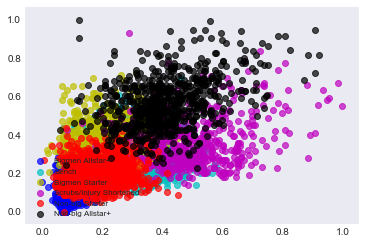

In [69]:
colors = ['b', 'c', 'y', 'm', 'r', 'k']

bigstar = plt.scatter(cluster_results[cluster_results.Cluster == 0].WS, 
            cluster_results[cluster_results.Cluster == 0].DRB, 
            c=colors[0], alpha=0.7)
bench = plt.scatter(cluster_results[cluster_results.Cluster == 1].WS, 
            cluster_results[cluster_results.Cluster == 1].DRB, 
            c=colors[1], alpha=0.7)
bigstarter = plt.scatter(cluster_results[cluster_results.Cluster == 2].WS, 
            cluster_results[cluster_results.Cluster == 2].DRB, 
            c=colors[2], alpha=0.7)
scrubs = plt.scatter(cluster_results[cluster_results.Cluster == 3].WS, 
            cluster_results[cluster_results.Cluster == 3].DRB, 
            c=colors[3], alpha=0.7)
smallstarter = plt.scatter(cluster_results[cluster_results.Cluster == 4].WS, 
            cluster_results[cluster_results.Cluster == 4].DRB, 
            c=colors[4], alpha=0.7)
smallstar = plt.scatter(cluster_results[cluster_results.Cluster == 5].WS, 
            cluster_results[cluster_results.Cluster == 5].DRB, 
            c=colors[5], alpha=0.7)

#x = plt.set_xlabel('Win Share per Season')
#y = plt.set_ylabel('Defensive Rebounds per Season')

plt.legend((bigstar, bench, bigstarter, scrubs, smallstarter, smallstar),
           ('Bigmen Allstar+', 'Bench', 'Bigmen Starter', 'Scrubs/Injury Shortened', 'Non-big Starter', 'Non-big Allstar+'),
           scatterpoints=1,
           loc='lower left',
           fontsize=8)

plt.show();

In [70]:
plt?

In [71]:
cluster_results.Cluster.unique()

array([5, 2, 0, 1, 3, 4])

In [72]:
from matplotlib.axes import Axes

Text(0,0.5,'Rebounds per Season')

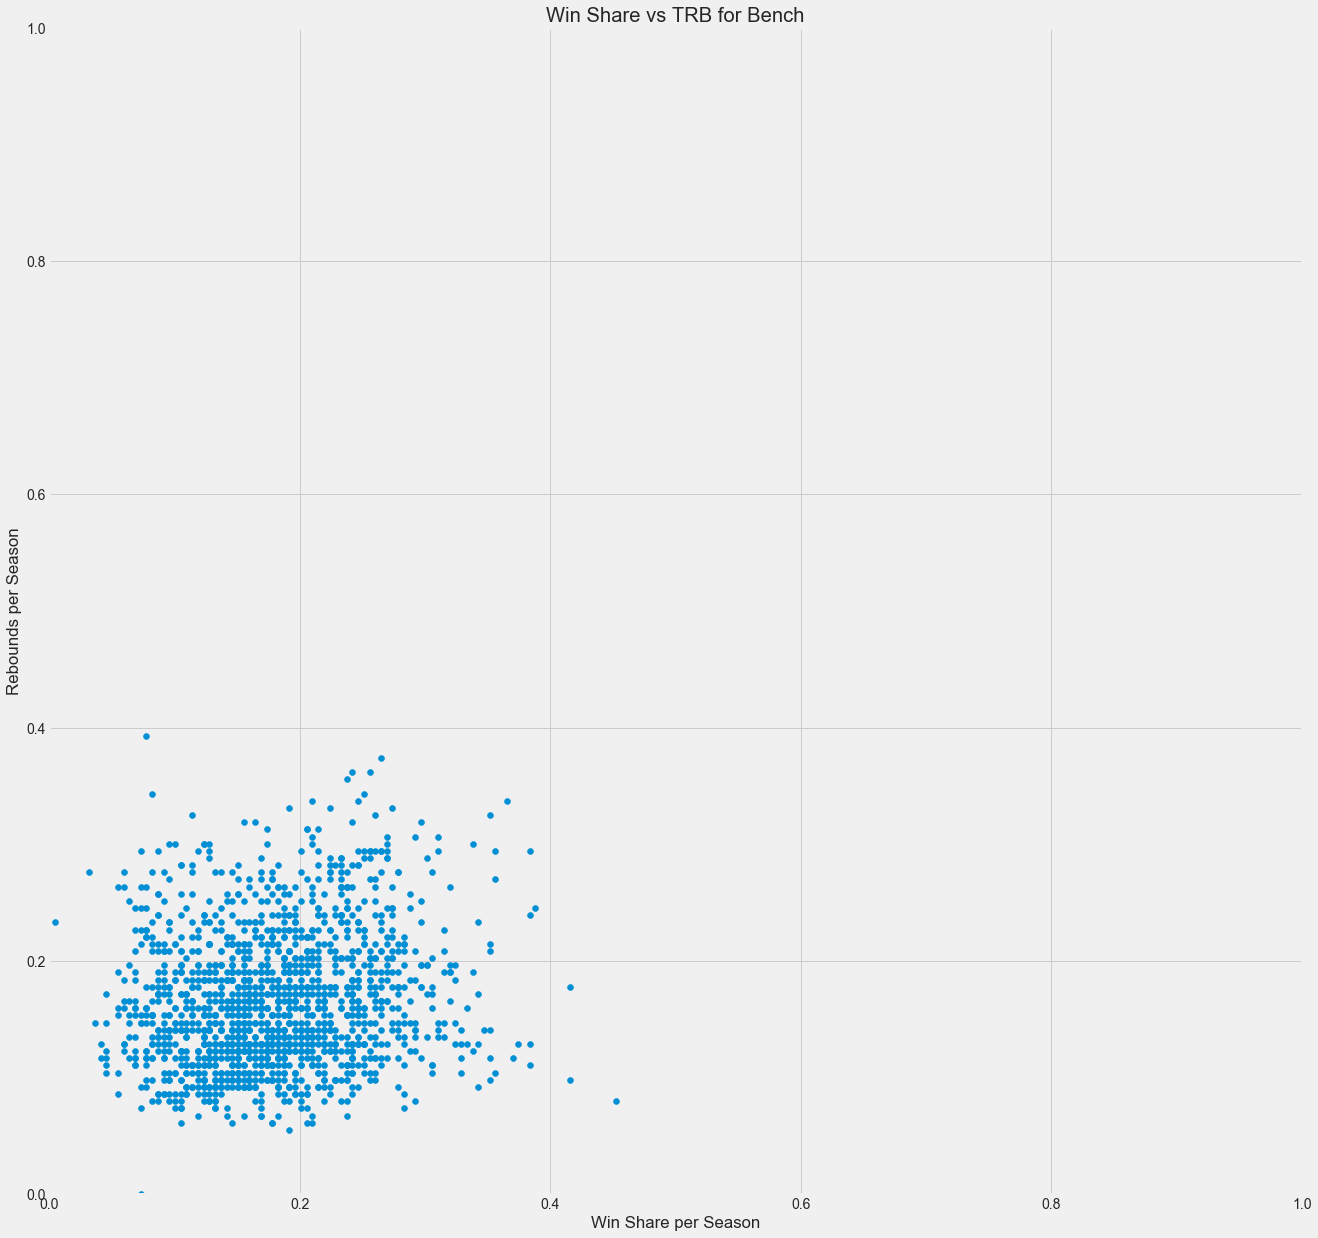

In [156]:
plt.style.use('fivethirtyeight')
plt.axes(xlim=(0,1), ylim=(0,1))

plt.scatter(cluster_results[cluster_results.Cluster == 0].WS, 
            cluster_results[cluster_results.Cluster == 0].TRB)
plt.title('Win Share vs TRB for Bench')
plt.xlabel('Win Share per Season')
plt.ylabel('Rebounds per Season')


Text(0,0.5,'Rebounds per Season')

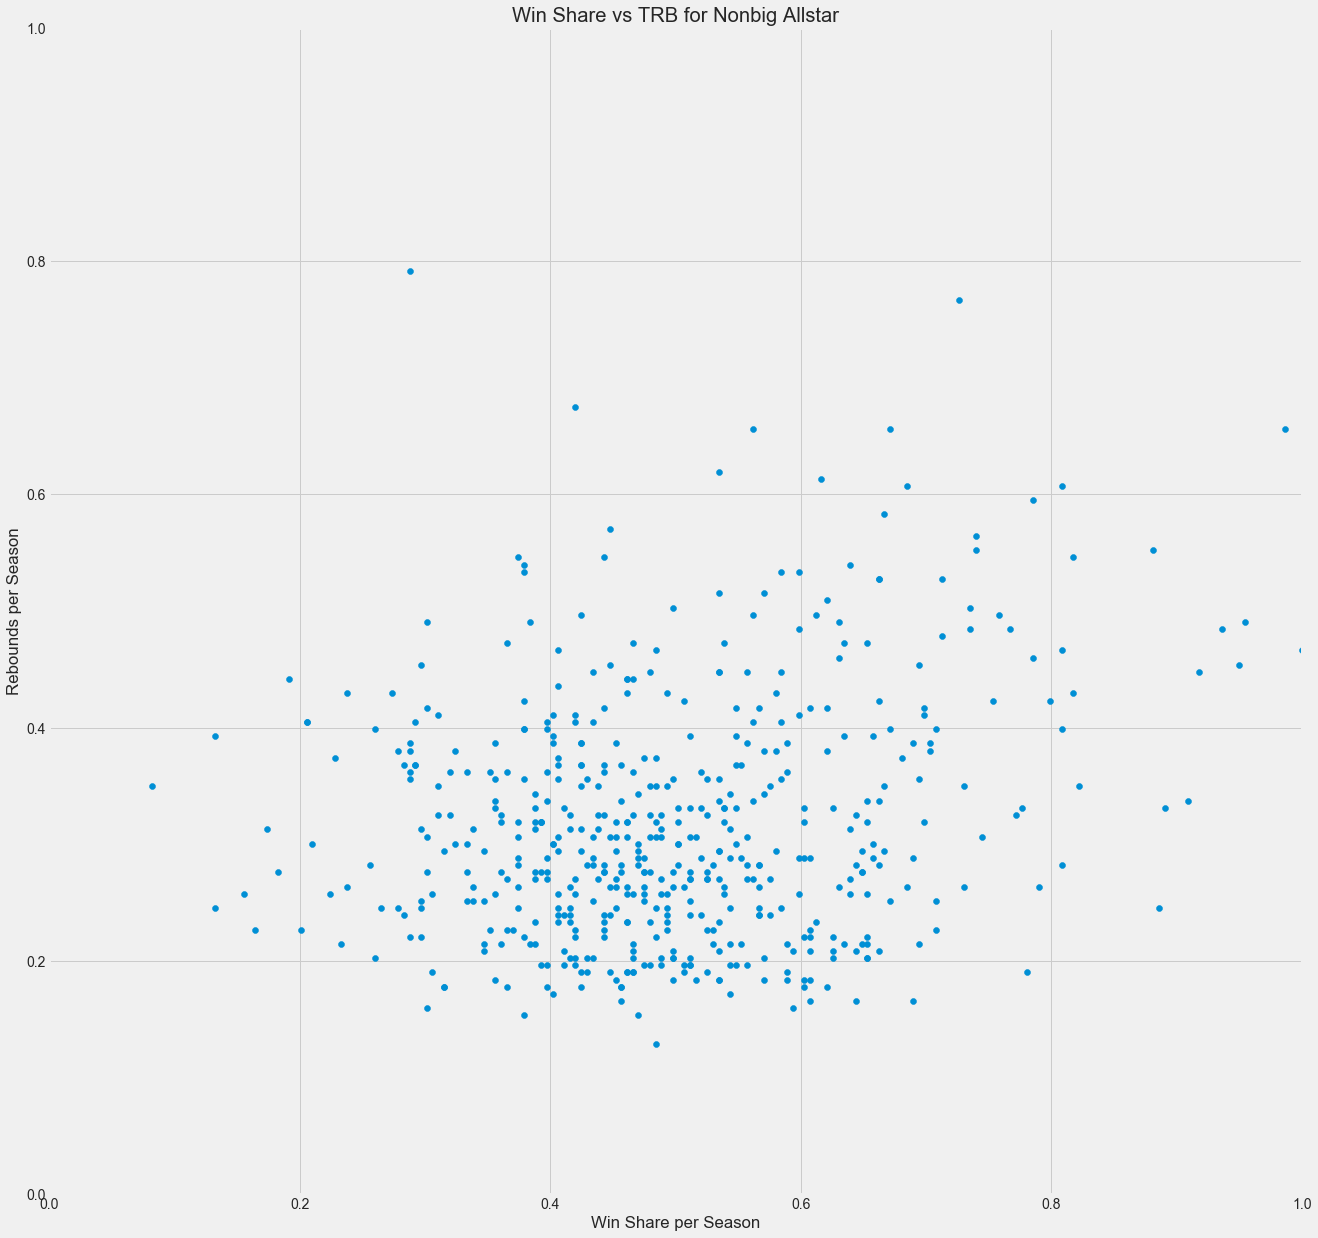

In [157]:
plt.style.use('fivethirtyeight')
plt.axes(xlim=(0,1), ylim=(0,1))

plt.scatter(cluster_results[cluster_results.Cluster == 1].WS, 
            cluster_results[cluster_results.Cluster == 1].TRB)
plt.title('Win Share vs TRB for Nonbig Allstar')
plt.xlabel('Win Share per Season')
plt.ylabel('Rebounds per Season')

Text(0,0.5,'Rebounds per Season')

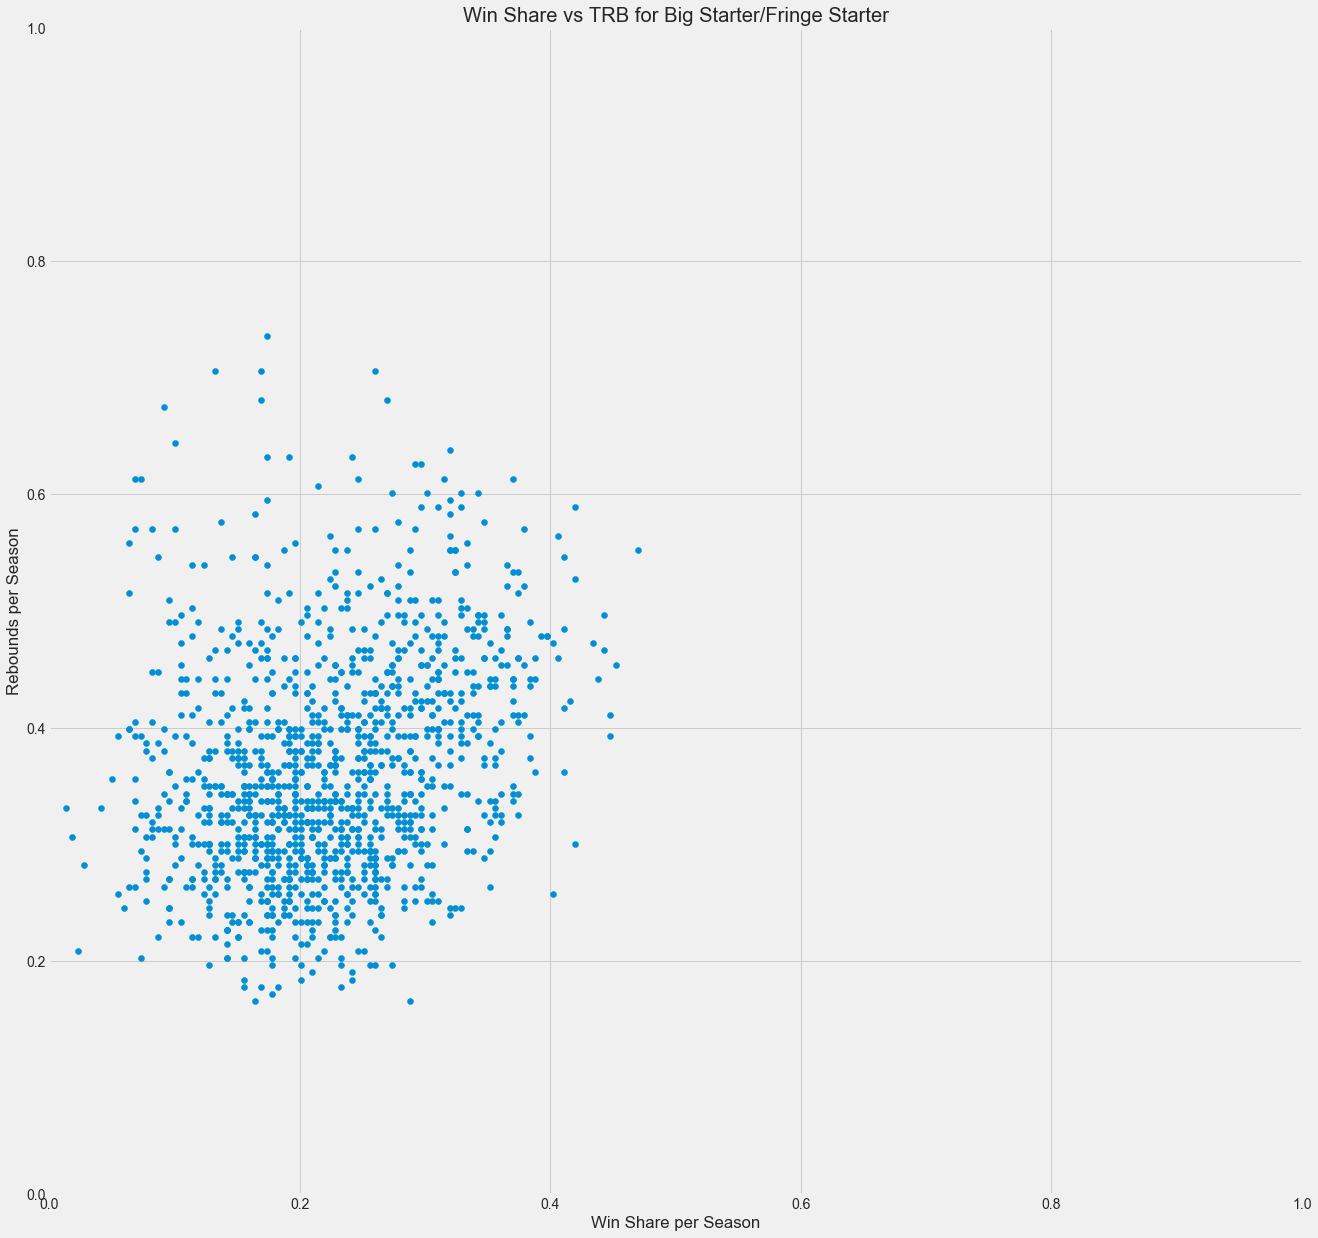

In [158]:
plt.style.use('fivethirtyeight')
plt.axes(xlim=(0,1), ylim=(0,1))

plt.scatter(cluster_results[cluster_results.Cluster == 2].WS, 
            cluster_results[cluster_results.Cluster == 2].TRB)
plt.title('Win Share vs TRB for Big Starter/Fringe Starter')
plt.xlabel('Win Share per Season')
plt.ylabel('Rebounds per Season')

Text(0,0.5,'Rebounds per Season')

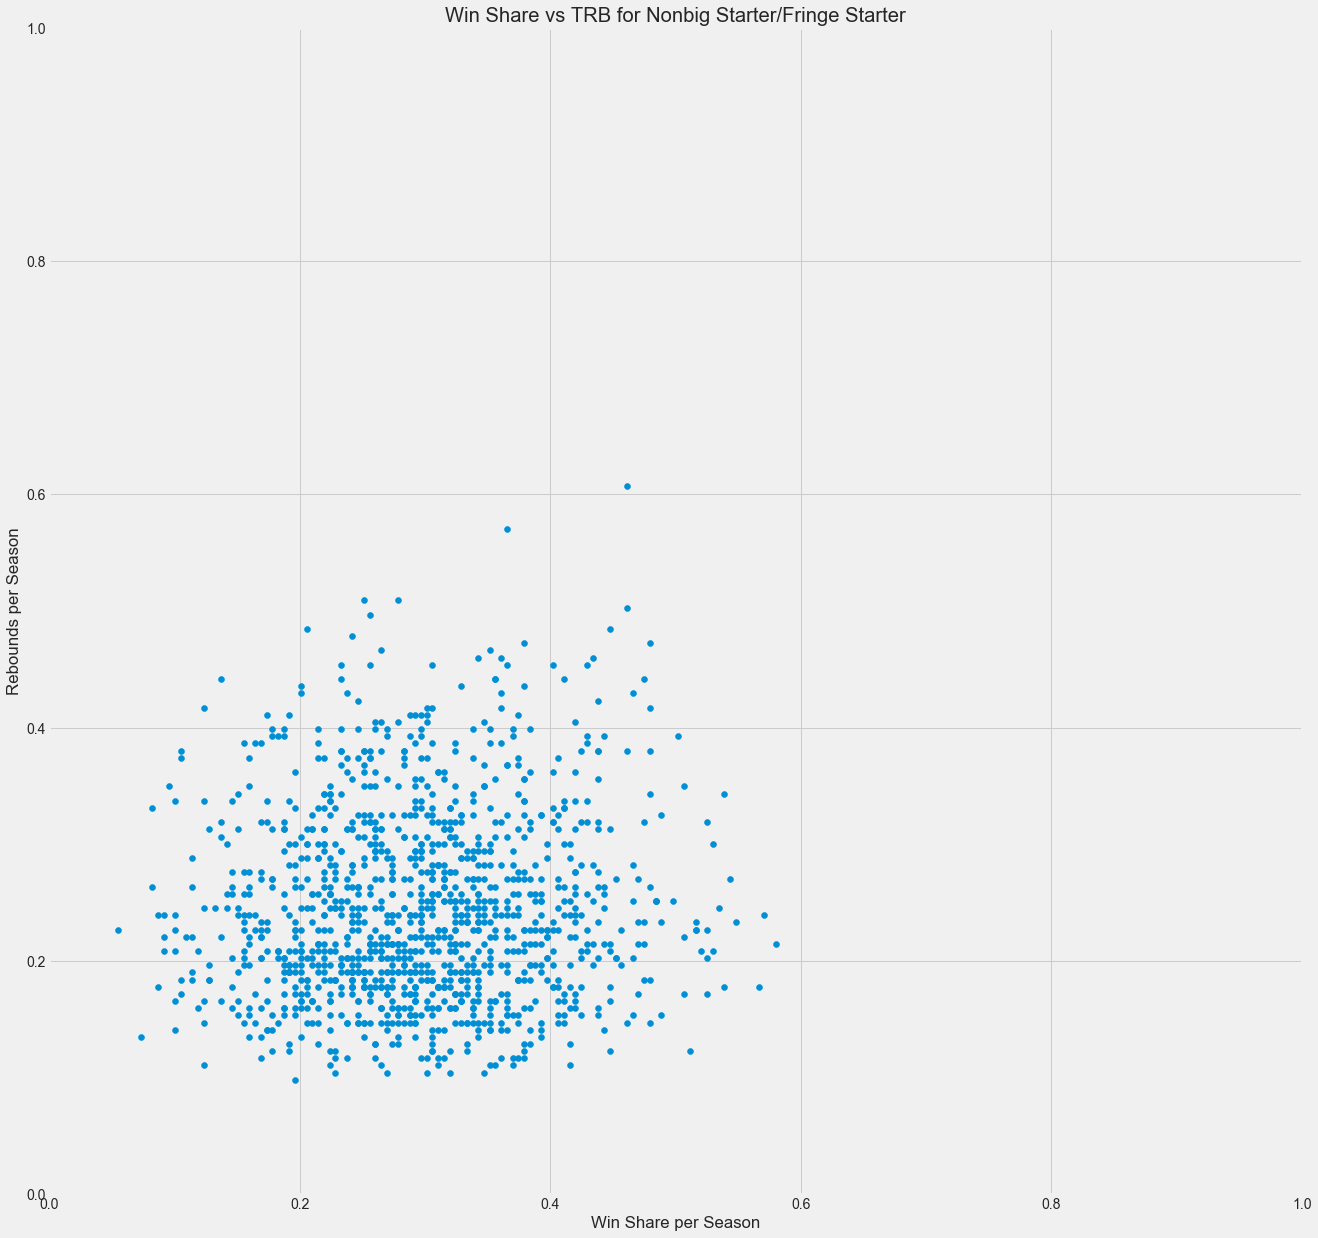

In [159]:
plt.style.use('fivethirtyeight')
plt.axes(xlim=(0,1), ylim=(0,1))

plt.scatter(cluster_results[cluster_results.Cluster == 3].WS, 
            cluster_results[cluster_results.Cluster == 3].TRB)
plt.title('Win Share vs TRB for Nonbig Starter/Fringe Starter')
plt.xlabel('Win Share per Season')
plt.ylabel('Rebounds per Season')

Text(0,0.5,'Rebounds per Season')

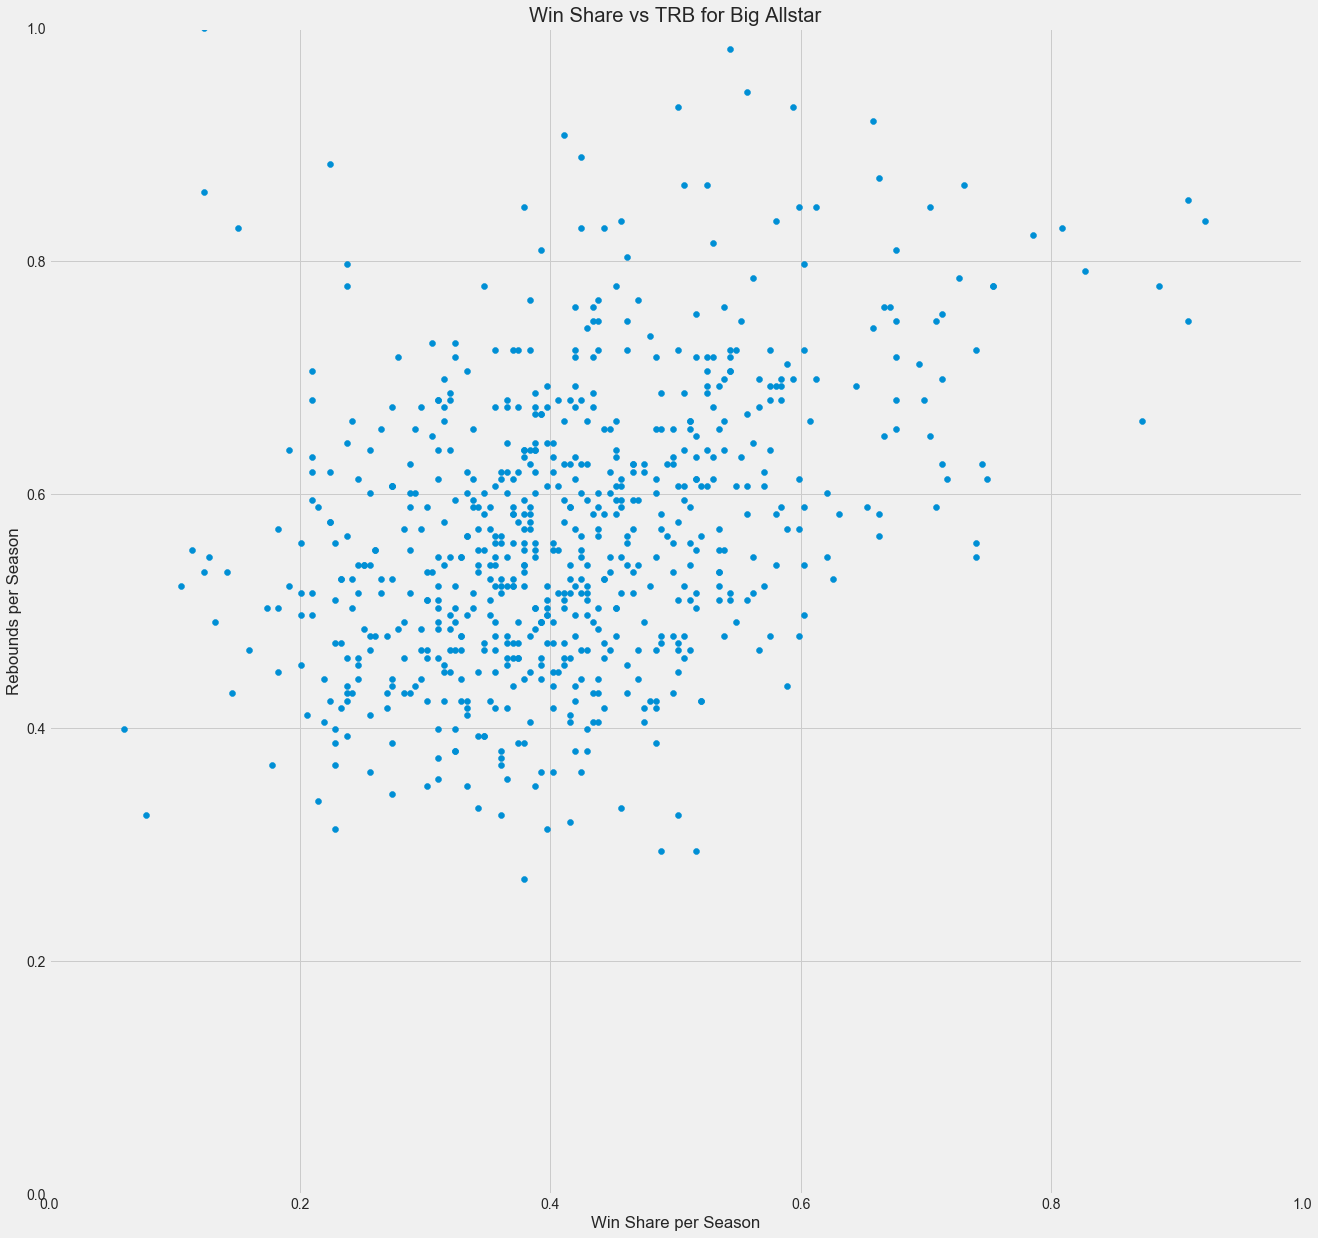

In [160]:
plt.style.use('fivethirtyeight')
plt.axes(xlim=(0,1), ylim=(0,1))

plt.scatter(cluster_results[cluster_results.Cluster == 4].WS, 
            cluster_results[cluster_results.Cluster == 4].TRB)
plt.title('Win Share vs TRB for Big Allstar')
plt.xlabel('Win Share per Season')
plt.ylabel('Rebounds per Season')

Text(0,0.5,'Rebounds per Season')

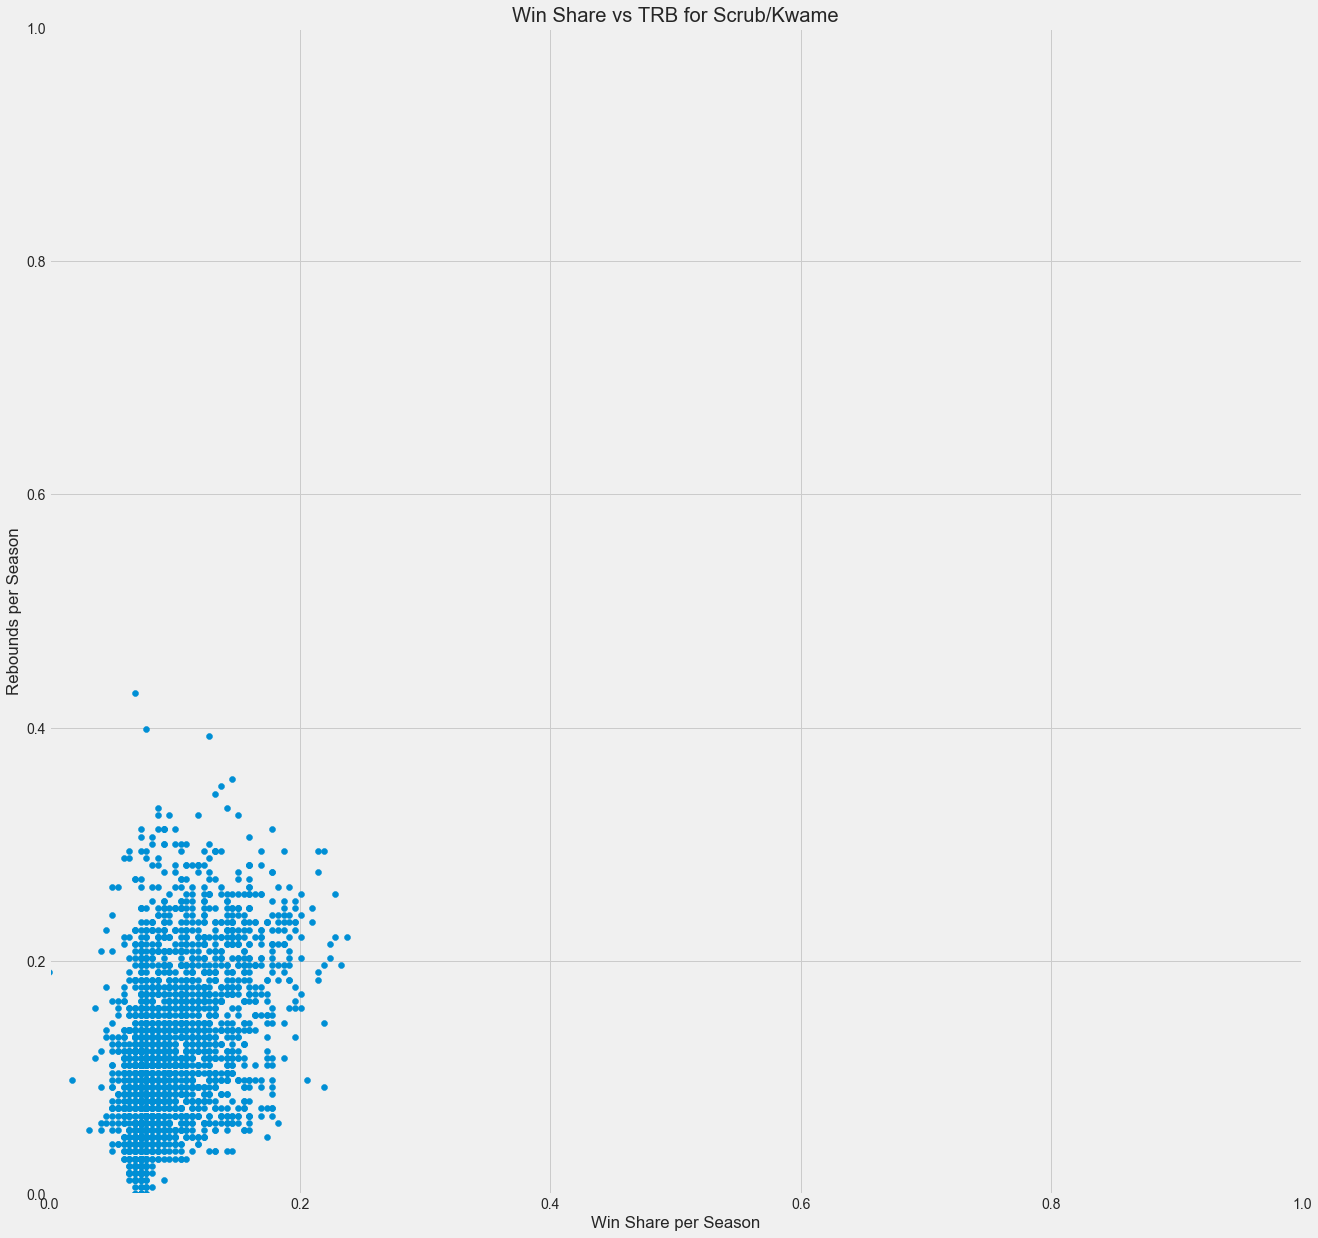

In [161]:
plt.style.use('fivethirtyeight')
plt.axes(xlim=(0,1), ylim=(0,1))

plt.scatter(cluster_results[cluster_results.Cluster == 5].WS, 
            cluster_results[cluster_results.Cluster == 5].TRB)
plt.title('Win Share vs TRB for Scrub/Kwame')
plt.xlabel('Win Share per Season')
plt.ylabel('Rebounds per Season')

In [29]:
ingram = pd.read_csv('data/BrandonIngram.csv')
trae = pd.read_csv('data/TraeYoung.csv')

In [30]:
ingram[value_cols]

,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,3P,...,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,PR
0,2279,8.5,-1.0,0.7,-0.3,-3.8,-1.1,3.5,8.7,0.7,...,6.3,1.7,2.7,0.8,3.2,4.0,2.1,0.6,0.5,-0.10808
1,1975,13.8,1.0,1.8,2.8,-1.3,0.4,6.1,12.9,0.7,...,11.1,3.3,4.8,1.0,4.4,5.3,3.9,0.8,0.7,16.60382


In [31]:
trae[value_cols]

,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,3P,...,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,PR
0,36,13,7.4,-5.18,2.22,-2.05,0,4.29,14.14,2.14,...,6.28,4.43,5.71,0.71,1.43,2.14,5.71,1.29,0.14,-4.215


In [32]:
with_young_guys = pd.concat([
    ingram[value_cols],
    trae[value_cols],
    numerical_data],
    axis=0
)
with_young_guys.head()

,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,3P,...,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,PR
0,2279,8.5,-1.0,0.70,-0.30,-3.80,-1.1,3.50,8.70,0.70,...,6.30,1.70,2.70,0.80,3.20,4.00,2.10,0.60,0.50,-0.10808
1,1975,13.8,1.0,1.80,2.80,-1.30,0.4,6.10,12.90,0.70,...,11.10,3.30,4.80,1.00,4.40,5.30,3.90,0.80,0.70,16.60382
0,36,13.0,7.4,-5.18,2.22,-2.05,0.0,4.29,14.14,2.14,...,6.28,4.43,5.71,0.71,1.43,2.14,5.71,1.29,0.14,-4.21500
199,2426,16.6,2.3,2.30,4.50,-0.30,1.1,6.40,12.40,0.00,...,12.30,4.00,5.50,2.80,5.10,7.90,1.30,0.90,0.70,16.11847
204,1943,13.6,0.9,2.40,3.30,0.10,1.0,3.80,8.30,0.60,...,6.60,0.90,1.30,1.20,3.80,5.00,2.10,0.70,1.10,6.76391


1 and 2 are Ingram, 3 is Trae

In [33]:
rookie_data_normalized = MinMaxScaler().fit_transform(with_young_guys)
rookie_data_normalized = pd.DataFrame(
                    rookie_data_normalized,
                    columns=with_young_guys.columns) 
rookie_data_normalized.head()

,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,3P,...,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,PR
0,0.65395,0.45107,0.10227,0.41176,0.05936,0.74350,0.06897,0.28689,0.31295,0.13725,...,0.26923,0.18085,0.20611,0.11765,0.27826,0.24540,0.17949,0.20690,0.11111,0.38111
1,0.56671,0.47519,0.21591,0.48880,0.20091,0.76592,0.17241,0.50000,0.46403,0.13725,...,0.47436,0.35106,0.36641,0.14706,0.38261,0.32515,0.33333,0.27586,0.15556,0.52518
2,0.01033,0.47155,0.57955,0.00000,0.17443,0.75919,0.14483,0.35164,0.50863,0.41961,...,0.26838,0.47128,0.43588,0.10441,0.12435,0.13129,0.48803,0.44483,0.03111,0.34570
3,0.69613,0.48794,0.28977,0.52381,0.27854,0.77489,0.22069,0.52459,0.44604,0.00000,...,0.52564,0.42553,0.41985,0.41176,0.44348,0.48466,0.11111,0.31034,0.15556,0.52099
4,0.55753,0.47428,0.21023,0.53081,0.22374,0.77848,0.21379,0.31148,0.29856,0.11765,...,0.28205,0.09574,0.09924,0.17647,0.33043,0.30675,0.17949,0.24138,0.24444,0.44035


In [34]:
ingram_normalized = rookie_data_normalized[rookie_data_normalized.index < 2]
ingram_normalized

,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,3P,...,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,PR
0,0.65395,0.45107,0.10227,0.41176,0.05936,0.74350,0.06897,0.28689,0.31295,0.13725,...,0.26923,0.18085,0.20611,0.11765,0.27826,0.24540,0.17949,0.20690,0.11111,0.38111
1,0.56671,0.47519,0.21591,0.48880,0.20091,0.76592,0.17241,0.50000,0.46403,0.13725,...,0.47436,0.35106,0.36641,0.14706,0.38261,0.32515,0.33333,0.27586,0.15556,0.52518


In [35]:
trae_normalized = rookie_data_normalized[rookie_data_normalized.index == 2]
trae_normalized

,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,3P,...,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,PR
2,0.01033,0.47155,0.57955,0.0,0.17443,0.75919,0.14483,0.35164,0.50863,0.41961,...,0.26838,0.47128,0.43588,0.10441,0.12435,0.13129,0.48803,0.44483,0.03111,0.3457


In [155]:
kmeans_cluster(rookie_data_normalized, 6).head()

,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,3P,...,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,PR,Cluster
0,0.65395,0.45107,0.10227,0.41176,0.05936,0.74350,0.06897,0.28689,0.31295,0.13725,...,0.18085,0.20611,0.11765,0.27826,0.24540,0.17949,0.20690,0.11111,0.38111,5
1,0.56671,0.47519,0.21591,0.48880,0.20091,0.76592,0.17241,0.50000,0.46403,0.13725,...,0.35106,0.36641,0.14706,0.38261,0.32515,0.33333,0.27586,0.15556,0.52518,0
2,0.01033,0.47155,0.57955,0.00000,0.17443,0.75919,0.14483,0.35164,0.50863,0.41961,...,0.47128,0.43588,0.10441,0.12435,0.13129,0.48803,0.44483,0.03111,0.34570,0
3,0.69613,0.48794,0.28977,0.52381,0.27854,0.77489,0.22069,0.52459,0.44604,0.00000,...,0.42553,0.41985,0.41176,0.44348,0.48466,0.11111,0.31034,0.15556,0.52099,2
4,0.55753,0.47428,0.21023,0.53081,0.22374,0.77848,0.21379,0.31148,0.29856,0.11765,...,0.09574,0.09924,0.17647,0.33043,0.30675,0.17949,0.24138,0.24444,0.44035,4


In [36]:
cluster_results['Cluster Name'] = ''
cluster_results['Cluster Name'][cluster_results['Cluster']==0] = 'Bench'
cluster_results['Cluster Name'][cluster_results['Cluster']==1] = 'Nonbig Allstar'
cluster_results['Cluster Name'][cluster_results['Cluster']==2] = 'Big Starter/Fringe Starter'
cluster_results['Cluster Name'][cluster_results['Cluster']==3] = 'Nonbig Starter/Fringe Starter'
cluster_results['Cluster Name'][cluster_results['Cluster']==4] = 'Big Allstar'
cluster_results['Cluster Name'][cluster_results['Cluster']==5] = 'scrub'

with_young_guys = with_young_guys.reset_index().drop('index', axis=1)
with_young_guys['Cluster Name'] = cluster_results['Cluster Name']



In [37]:
with_young_guys

,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,3P,...,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,PR,Cluster Name
0,2279,8.5,-1.0,0.70,-0.30,-3.80,-1.1,3.50,8.70,0.70,...,1.70,2.70,0.80,3.20,4.00,2.10,0.60,0.50,-0.10808,Big Allstar
1,1975,13.8,1.0,1.80,2.80,-1.30,0.4,6.10,12.90,0.70,...,3.30,4.80,1.00,4.40,5.30,3.90,0.80,0.70,16.60382,Big Starter/Fringe Starter
2,36,13.0,7.4,-5.18,2.22,-2.05,0.0,4.29,14.14,2.14,...,4.43,5.71,0.71,1.43,2.14,5.71,1.29,0.14,-4.21500,scrub
3,2426,16.6,2.3,2.30,4.50,-0.30,1.1,6.40,12.40,0.00,...,4.00,5.50,2.80,5.10,7.90,1.30,0.90,0.70,16.11847,scrub
4,1943,13.6,0.9,2.40,3.30,0.10,1.0,3.80,8.30,0.60,...,0.90,1.30,1.20,3.80,5.00,2.10,0.70,1.10,6.76391,Big Starter/Fringe Starter
5,559,13.6,0.5,0.50,1.00,-3.10,-0.1,1.80,4.10,0.00,...,1.50,1.90,1.00,2.00,3.00,0.50,0.40,0.30,-10.00229,scrub
6,429,6.7,-0.5,0.30,-0.20,-8.10,-0.7,1.10,3.00,0.10,...,0.10,0.20,0.50,1.10,1.50,0.30,0.20,0.20,-17.68428,scrub
7,1356,9.5,-1.8,1.90,0.20,-4.00,-0.7,2.30,5.50,0.00,...,0.90,2.80,2.70,3.90,6.60,0.60,0.60,1.10,-2.73029,Nonbig Starter/Fringe Starter
8,198,6.3,-0.2,0.20,0.00,-5.80,-0.2,0.90,2.30,0.00,...,0.70,0.90,0.70,1.10,1.80,0.30,0.20,0.30,-18.02960,Big Allstar
9,135,7.7,-0.1,0.10,0.00,-4.90,-0.1,1.60,4.10,0.00,...,0.80,1.00,1.90,1.70,3.60,0.60,0.20,0.10,-14.76186,scrub
